In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix,f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display






In [ ]:
# Definim caracteristicile pe care dorim să le folosim
main_labels = [
    "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets",
    "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
    "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min",
    "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean",
    "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std",
    "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
    "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length",
    "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance",
    "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count",
    "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size",
    "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate",
    "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes",
    "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
    "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"
]


data = pd.read_csv('all_data.csv')

# coloanele relevante
data = data[main_labels]

# forma setului de date
print("Forma setului de date după selecție:", data.shape)
data.head()


C:\Users\lazar\AppData\Local\Temp\ipykernel_8908\883447380.py:23: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_data.csv')


Forma setului de date după selecție: (2830743, 77)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,3,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:

print("Valorile unice din 'Label':", data["Label"].unique())

# Convertim eticheta in valori numerice
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Label"])

print("Conversie finalizată! Valorile etichetei după encoding:", np.unique(data["Label"]))


Valorile unice din 'Label': ['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack - Brute Force'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'Infiltration' 'Bot'
 'PortScan' 'DDoS']
Conversie finalizată! Valorile etichetei după encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
# identif coloane non numerice
categorical_columns = data.select_dtypes(include=['object']).columns
print("Coloane non-numerice înainte de conversie:", categorical_columns.tolist())

# Convertim coloanele
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print("Toate coloanele sunt acum numerice!")


Coloane non-numerice înainte de conversie: []
Toate coloanele sunt acum numerice!


In [ ]:
# Îinlocuim valorile NaN cu 0 pentru a evita erorile
data = data.fillna(0)


In [ ]:
# Separam caracteristicile si eticheta
X = data.drop(columns=["Label"])
y = data["Label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Setul de antrenament are forma:", X_train.shape)
print("Setul de test are forma:", X_test.shape)


Setul de antrenament are forma: (2264594, 76)
Setul de test are forma: (566149, 76)


In [26]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

print("Model Random Forest antrenat cu succes!")


Model Random Forest antrenat cu succes!


In [ ]:
# Prezicem pe setul de test
y_pred = rf.predict(X_test)

# Matricea de confuzie si raportul de clasificare
print("Matricea de confuzie:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport de clasificare:")
print(classification_report(y_test, y_pred))


Matricea de confuzie:
[[470104     61   1324      2    103     58      1      0      0      0
     204      0      0      0      1]
 [    93    300      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [  4117      0   4249      0      1      0      0      0      0      0
       0      0      0      0      0]
 [     1      0      0   2054      3      1      0      0      0      0
       0      0      0      0      0]
 [    61      0      0      3  46149      0      0      0      0      0
       2      0      0      0      0]
 [     4      0      0      1      0   1088      7      0      0      0
       0      0      0      0      0]
 [     4      0      0      2      0      1   1151      0      0      0
       0      0      1      0      0]
 [     2      0      0      0      0      0      0   1586      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      2      0
       0      0      0    

Top 40 caracteristici importante pentru model:
1. Init_Win_bytes_backward - Importanta: 0.0619
2. Init_Win_bytes_forward - Importanta: 0.0347
3. min_seg_size_forward - Importanta: 0.0312
4. Fwd Packet Length Max - Importanta: 0.0287
5. Flow IAT Mean - Importanta: 0.0279
6. Fwd IAT Mean - Importanta: 0.0277
7. Bwd Packets/s - Importanta: 0.0274
8. Total Length of Fwd Packets - Importanta: 0.0251
9. Average Packet Size - Importanta: 0.0246
10. Subflow Fwd Bytes - Importanta: 0.0240
11. Flow IAT Max - Importanta: 0.0238
12. Flow IAT Std - Importanta: 0.0235
13. Bwd Packet Length Max - Importanta: 0.0234
14. Fwd Packet Length Std - Importanta: 0.0226
15. Flow Duration - Importanta: 0.0225
16. Packet Length Mean - Importanta: 0.0224
17. Bwd Header Length - Importanta: 0.0223
18. Avg Bwd Segment Size - Importanta: 0.0213
19. Subflow Bwd Bytes - Importanta: 0.0212
20. Avg Fwd Segment Size - Importanta: 0.0210
21. Fwd Packet Length Mean - Importanta: 0.0204
22. Fwd IAT Max - Importanta: 0.0202

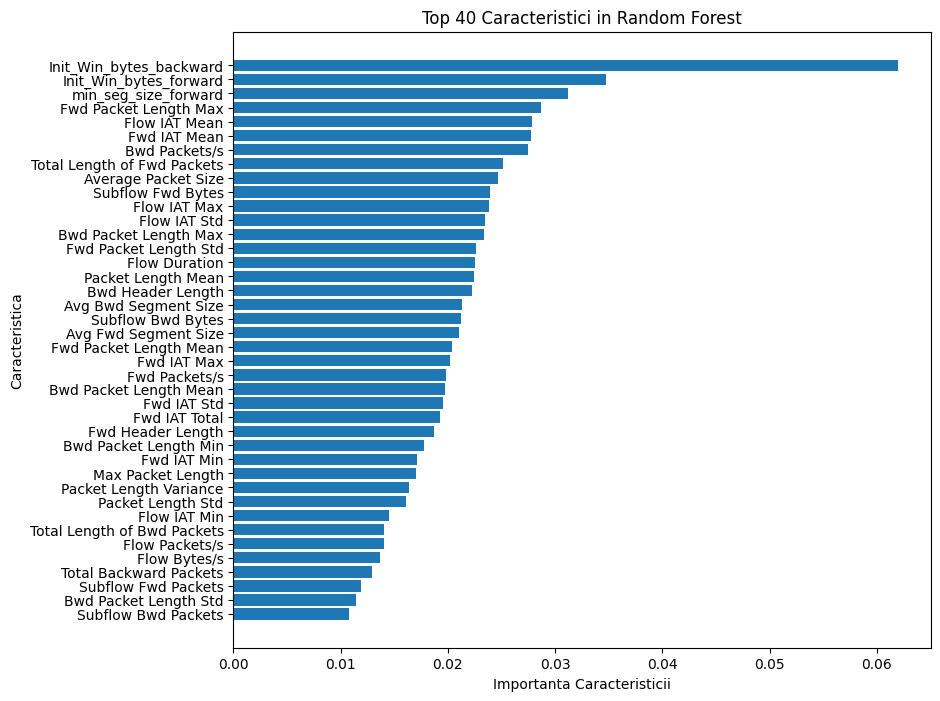

In [ ]:
# importanta caracteristicilor cu metoda interna gini + mdi
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sorteaza descrescător

# Selectam primele 40 de caracteristici cele mai importante
top_n = 40
top_features = X_train.columns[indices][:top_n]


print("Top 40 caracteristici importante pentru model:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature} - Importanta: {importances[indices[i]]:.4f}")

# dataframe cu imp caracteristicilor
importance_df = pd.DataFrame({"Feature": X_train.columns[indices], "Importance": importances[indices]})


plt.figure(figsize=(9, 8))
plt.barh(importance_df['Feature'][:40], importance_df['Importance'][:40])
plt.xlabel("Importanta Caracteristicii")
plt.ylabel("Caracteristica")
plt.title("Top 40 Caracteristici in Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Lista de numere de caracteristici pe care le testam
num_features_list = [10, 20, 30, 40]
results = []

for num_features in num_features_list:
   
    selected_features = importance_df.head(num_features)["Feature"].tolist()
    
    # Cream subseturile de antrenare si test
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Antrenam modelul Random Forest pe subsetul de caracteristici
    rf_model_subset = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model_subset.fit(X_train_subset, y_train)

    # facem predictie
    y_pred_subset = rf_model_subset.predict(X_test_subset)

    
    accuracy = accuracy_score(y_test, y_pred_subset)
    precision = precision_score(y_test, y_pred_subset, average='macro')
    recall = recall_score(y_test, y_pred_subset, average='macro')
    f1_subset = f1_score(y_test, y_pred_subset, average="macro")
    
    results.append([num_features, accuracy, precision, recall, f1_subset])

results_df = pd.DataFrame(results, columns=['Top Caracteristici', 'Acuratete', 'Precizie', 'Recall', 'F1-Score'])


display(results_df)



,Top Caracteristici,Acuratete,Precizie,Recall,F1-Score
0,10,0.986986,0.860705,0.773037,0.797744
1,20,0.988353,0.865661,0.820650,0.839047
2,30,0.989047,0.871660,0.822450,0.841862
3,40,0.988793,0.867493,0.818904,0.837804


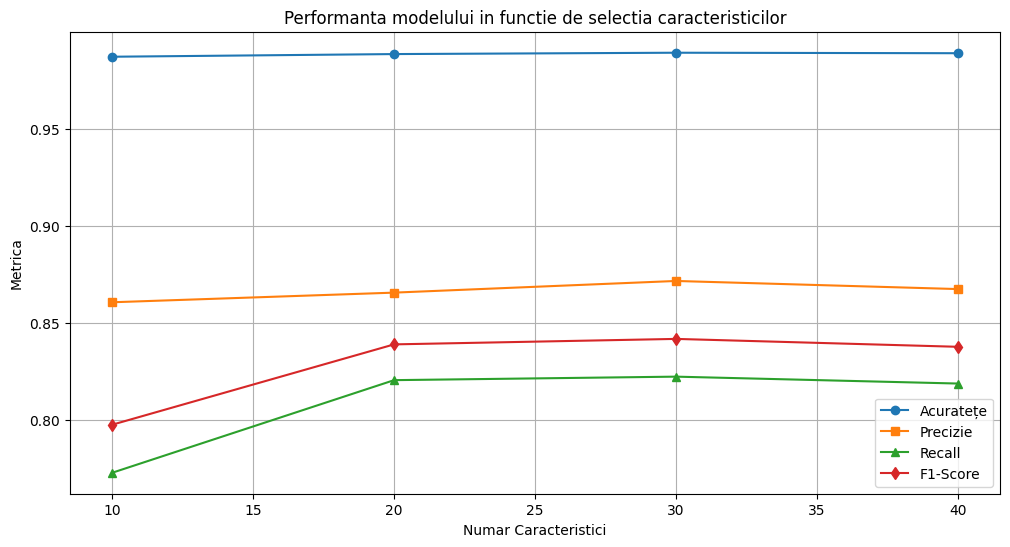

In [30]:
plt.figure(figsize=(12,6))
plt.plot(results_df['Top Caracteristici'], results_df['Acuratete'], marker='o', label="Acuratețe")
plt.plot(results_df['Top Caracteristici'], results_df['Precizie'], marker='s', label="Precizie")
plt.plot(results_df['Top Caracteristici'], results_df['Recall'], marker='^', label="Recall")
plt.plot(results_df['Top Caracteristici'], results_df['F1-Score'], marker='d', label="F1-Score")

plt.xlabel("Numar Caracteristici")
plt.ylabel("Metrica")
plt.title("Performanta modelului in functie de selectia caracteristicilor")
plt.legend()
plt.grid(True)
plt.show()
